# The 5 main steps to create word clouds in R


http://www.sthda.com/english/wiki/text-mining-and-word-cloud-fundamentals-in-r-5-simple-steps-you-should-know

  1. Create a text file
   - Copy and paste the text in a plain text file (e.g : ml.txt)
   - Save the file
   - Note that, the text should be saved in a plain text (.txt) file format using your favorite text editor.


  2. Load the data as a corpus
    - A corpus can hold several documents.  In this example there is only 1.
  

 3. Inspect the document contents
    - Check out the document before processing it.
    - Remove special characters using tm_map
    - Tidy the document by removing extra whitespace, standardizing capitalization and removing stop words.
    
 4.  Build a term-document matrix
  - A Document matrix is a table containing the frequency of the words. 
  - Column names are words and row names are documents. 
  - The function TermDocumentMatrix() from text mining package can be used for this.
  
 5. Generate the word cloud.

Install and load the required packages

In [1]:
# Install
# install.packages("tm")  # for text mining
# install.packages("SnowballC") # for text stemming
# install.packages("wordcloud") # word-cloud generator 
# install.packages("RColorBrewer") # color palettes
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Loading required package: NLP

Loading required package: RColorBrewer



## Step 1

Load the text.  This is done using the Corpus() function from text mining (tm) package. Corpus is a list of a documents (in our case, we only have one document).



In [2]:
# For simplicity, here we'll read the text file from internet

filePath <- "http://www.sthda.com/sthda/RDoc/example-files/martin-luther-king-i-have-a-dream-speech.txt"
text <- readLines(filePath)

## Step 2

Load the data as a corpus

In [3]:
docs <- Corpus(VectorSource(text))
#VectorSource() function creates a corpus of character vectors

## Step 3 

Inspect the document

In [4]:
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 46

 [1]                                                                                                                                                                                                                                                                                                                                                                                                               
 [2] And so even though we face the difficulties of today and tomorrow, I still have a dream. It is a dream deeply rooted in the American dream.                                                                                                                                                                                                                                                                   
 [3]                                                                                       

Text transformation is performed using tm_map() function to replace, for example, special characters from the text.

Replacing “/”, “@” and “|” with space:

In [5]:
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")

Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, toSpace, "@"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, toSpace, "\\|"):
“transformation drops documents”


Cleaning the text: the tm_map() function is used 
  - to remove unnecessary white space, 
  - to convert the text to lower case, 
  - to remove common stopwords like ‘the’, “we”.

The information value of ‘stopwords’ is near zero due to the fact that they are so common in a language. Removing this kind of words is useful before further analyses. For ‘stopwords’, supported languages are danish, dutch, english, finnish, french, german, hungarian, italian, norwegian, portuguese, russian, spanish and swedish. Language names are case sensitive.

You can make your own list of stopwords to remove from the text.

You could also remove numbers and punctuation with removeNumbers and removePunctuation arguments.

Another important preprocessing step is to make a text stemming which reduces words to their root form. In other words, this process removes suffixes from words to make it simple and to get the common origin. For example, a stemming process reduces the words “moving”, “moved” and “movement” to the root word, “move”.

Note that, text stemming require the package ‘SnowballC’.

In [6]:
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove your own stop word
# specify your stopwords as a character vector
docs <- tm_map(docs, removeWords, c("blabla1", "blabla2")) 
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)
# Text stemming
# docs <- tm_map(docs, stemDocument)

Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeWords, c("blabla1", "blabla2")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
“transformation drops documents”


## Step 4 

Build a term-document matrix.  This is a table containing the frequency of the words. Column names are words and row names are documents. The function TermDocumentMatrix() from text mining package can be used.


In [7]:
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

,word,freq
,<fct>,<dbl>
will,will,17
freedom,freedom,13
ring,ring,12
dream,dream,11
day,day,11
let,let,11
every,every,9
one,one,8
able,able,8


## Step 5

Generate the Word cloud

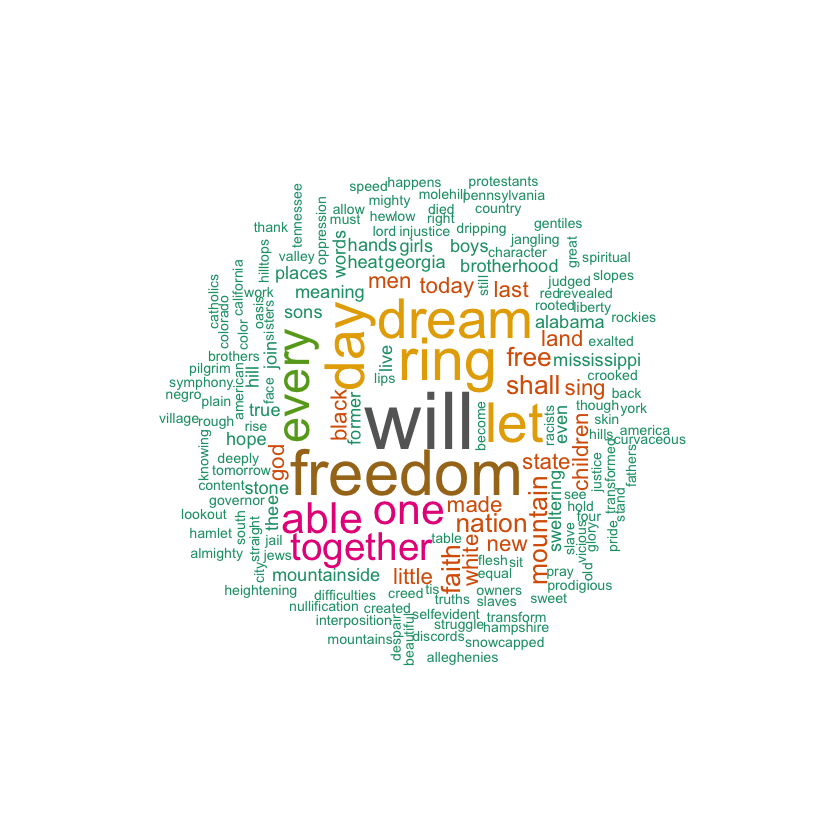

In [8]:
set.seed(1234)# This makes the cloud reproducable.

wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))
          

The above word cloud clearly shows that “Will”, “freedom”, “dream”, “day” and “together” are the five most important words in the “I have a dream speech” from Martin Luther King.

Arguments of the word cloud generator function :


 - words : the words to be plotted
 - freq : their frequencies
 - min.freq : words with frequency below min.freq will not be plotted
 - max.words : maximum number of words to be plotted
 - random.order : plot words in random order. If false, they will be plotted in decreasing frequency
 - rot.per : proportion words with 90 degree rotation (vertical text)
 - colors : color words from least to most frequent. Use, for example, colors =“black” for single color.

# Go further
Explore frequent terms and their associations

You can have a look at the frequent terms in the term-document matrix.  Let's find words that occur at least four times :

In [9]:
findFreqTerms(dtm, lowfreq = 4)
 

[1] "dream"    "day"      "nation"   "one"      "will"     "able"    
 [7] "together" "freedom"  "every"    "mountain" "shall"    "faith"   
[13] "free"     "let"      "ring"

You can analyze the association between frequent terms (i.e., terms which correlate) using findAssocs() function. The R code below identifies which words are associated with “freedom” in I have a dream speech :

In [10]:
findAssocs(dtm, terms = "freedom", corlimit = 0.3)

$freedom
         let         ring  mississippi        stone mountainside        state 
        0.89         0.86         0.34         0.34         0.34         0.32 
       every     mountain 
        0.32         0.32

Plot word frequencies

The frequency of the first 10 frequent words are plotted :

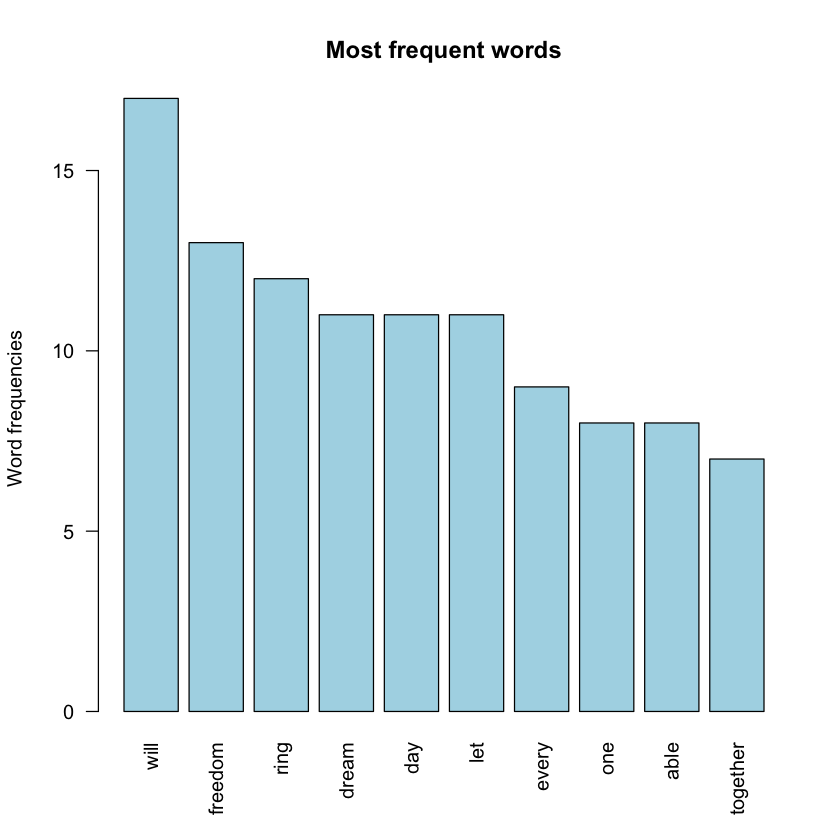

In [11]:
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")